##### ***Q2 : Epilepsy is a nervous system disorder that affects movement. The dataset contains 195 records of various people with 23 features that contain biomedical measurements.  Your model will be used to differentiate healthy people from people having the disease. Target Column is 'status'. Identify the model with the best params.Please note:Visualisation is mandatory. You will receive 0 marks if you do not add visualisation.***

**DATA LINK** : https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data

#### **Import Necessary libraries**

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

%matplotlib inline

#### **Data Analysis and Data Cleaning**

In [438]:
# Opening the epilepsy data downloaded from Link
# and storing in data frame using Pandas
df=pd.read_csv('epilepsy_data.csv')
df.set_index('name',inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [439]:
# df.shape is an attribute of a pandas DataFrame that returns a tuple representing the dimensions of the DataFrame. 
# The tuple has the form (nrows, ncols), where nrows is the number of rows and ncols is the number of columns in the DataFrame.
print(df.shape)
# df.info() is a pandas function that returns information about a DataFrame, including the data types of each column, 
# the number of non-null values in each column, and the memory usage of the DataFrame.
df.info()

(195, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          193 non-null    float64
 7   Jitter:DDP        194 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status         

In [440]:
# df.describe() is a pandas function that returns descriptive statistics of a DataFrame.
# It provides a summary of the central tendency, dispersion, and shape of the distribution of the data, excluding NaN values.
df.describe()
# We see that mean and median of all columns are around the same range.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [441]:
# df.isna().mean() combines two functions and returns the mean of the boolean values in the isna() DataFrame.
#  This can be used to compute the percentage of missing values in each column of the original DataFrame.
df.isna().mean()

MDVP:Fo(Hz)         0.000000
MDVP:Fhi(Hz)        0.000000
MDVP:Flo(Hz)        0.000000
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            0.010256
Jitter:DDP          0.005128
MDVP:Shimmer        0.000000
MDVP:Shimmer(dB)    0.000000
Shimmer:APQ3        0.000000
Shimmer:APQ5        0.000000
MDVP:APQ            0.000000
Shimmer:DDA         0.000000
NHR                 0.000000
HNR                 0.000000
status              0.000000
RPDE                0.000000
DFA                 0.000000
spread1             0.000000
spread2             0.000000
D2                  0.000000
PPE                 0.000000
dtype: float64

In [442]:
# df.dropna() is a pandas function that returns a new DataFrame with rows that contain missing values 
# (NaN or None) removed.
df=df.dropna()

# Feature Selection using Correlation-based feature selection

Correlation-based feature selection: You can use the pairwise correlations between the features and the target variable to select the most relevant features. You can use the df.corr() function to compute the correlations, and then select the features with the highest absolute correlations.

In [443]:
# Extract the features and target variable
X = df.drop("status", axis=1)
y = df["status"]

# Calculate the pairwise correlations between the features and target variable
corr = X.corrwith(y)

# Select the features with the highest absolute correlations
selected_features = corr[abs(corr) > 0.1].index

# Print the selected features
print(selected_features)


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


Feature selected here is based on pairwise correlation >0.1 absolute correlations 

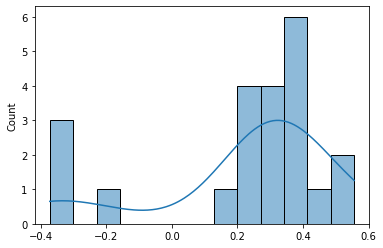

In [444]:
# Plot the relative frequency of the correlations
sns.histplot(corr, kde=True)

# Show the plot
plt.show()

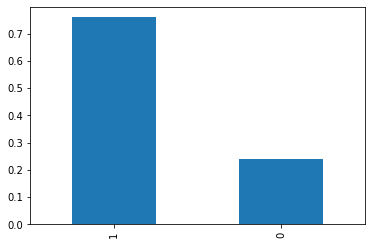

In [445]:
# df['status'].value_counts(normalize=True).plot(kind='bar') 
# plots the relative frequency of each unique value in the 'status' column as a bar chart.
# The kind parameter specifies the type of plot to use; in this case, a bar chart is used

#chech whether data is balanced or not
df['status'].value_counts(normalize=True).plot(kind='bar');
#we see that 

In [446]:
# Checking columns in data frame
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

Feature Selected are proceeding for further analysis

In [447]:
print(selected_features)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [448]:
#target and feature data segregation

# Here Target is status
target='status'

# Selected features
features=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']
       
X=df[features]
y=df[target]

In [449]:
# Checking shape of x and y
X.shape,y.shape

((192, 22), (192,))

1. train_test_split is a function from the sklearn.model_selection module that splits a dataset into training and test sets. It takes two required arguments: X and y, which are the features and target variables, respectively.
2. The test_size parameter specifies the proportion of the data to include in the test set. In this case, test_size=0.2 means that the test set will be 20% of the total data.
3. The random_state parameter specifies a seed for the random number generator used to shuffle the data before splitting. This makes the split deterministic, meaning that it will always produce the same train/test sets for a given random_state value.

# MODEL-1 : Logistic Regression Model

In [450]:
# train_test_split returns a tuple of four arrays: X_train, X_test, y_train, and y_test, 
# which are the training and test sets for the features and target variables, respectively.

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)



Baseline accuracy

In [451]:
# y_base_frequency=y_train.value_counts(normalize=True).max() assigns 
# the maximum relative frequency of the values in the y_train series to the y_base_accuracy variable.

#Baseline accuracy
y_base_accuracy=y_train.value_counts(normalize=True).max()
y_base_accuracy

0.7712418300653595

In [452]:
# scale=StandardScaler() creates an instance of the StandardScaler class and assigns it to the scale variable.
# This instance can be used to fit and transform data to standardize the scale of the features.
scale=StandardScaler()
X_train=pd.DataFrame(scale.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scale.transform(X_test),columns=X.columns)

In [453]:
# lm=LogisticRegression() creates an instance of the LogisticRegression class and assigns it to the lm variable.
# This instance can be used to fit a logistic regression model to a training dataset and make predictions on new data.
lm=LogisticRegression()
rfe=RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True False  True False  True
  True False False  True  True False  True  True  True  True]
[1 1 7 1 1 1 5 1 3 1 4 1 1 2 8 1 1 6 1 1 1 1]


In [454]:
col=X_train.columns[rfe.support_]
X_train=X_train[col]
X_test=X_test[col]

In [455]:
lm.fit(X_train,y_train)

LogisticRegression()

In [456]:
# Compute the accuracy scores on the training and test sets
train_score = lm.score(X_train, y_train)
test_score = lm.score(X_test, y_test)

In [457]:
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

0.8823529411764706
0.8717948717948718


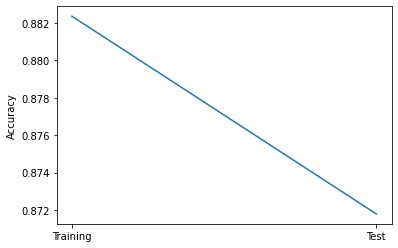

In [458]:
# Plot the accuracy scores
plt.plot([train_score, test_score])
plt.xticks([0, 1], ["Training", "Test"])
plt.ylabel("Accuracy")

# Show the plot
plt.show()

So, our accuracy after Logistic regression  improved by roughly 10%

<AxesSubplot:>

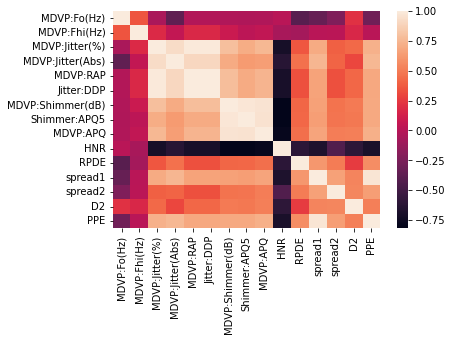

In [459]:
sns.heatmap(X_train.corr())

#### In above model, we let some of the data go to waste when we used the RFE function to choose columns which provide best predictions. Furthermore, there are cases of high correlation among the independent variables in 'X_train'.So, we move on to decision tree model.

# MODEL-2 : DECISION TREE MODEL

In [460]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [461]:
dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [462]:
# Compute the accuracy scores on the training and test sets
train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

In [463]:
#accuracy scores
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8974358974358975


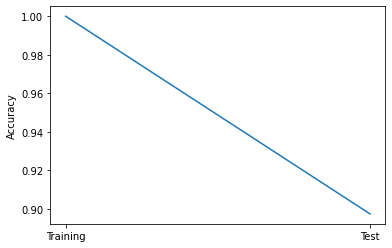

In [464]:
# Plot the accuracy scores
plt.plot([train_score, test_score])
plt.xticks([0, 1], ["Training", "Test"])
plt.ylabel("Accuracy")

# Show the plot
plt.show()

# MODEL-3 : Random Forest

In [465]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [466]:
clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [467]:
cv_acc_scores = cross_val_score(clf,X_train,y_train,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.87096774 0.87096774 0.93548387 0.96666667 0.9       ]


In [468]:
params = {
    'randomforestclassifier__n_estimators':range(25,100,10),
    'randomforestclassifier__max_depth':range(10,21,1)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 10),
 'randomforestclassifier__max_depth': range(10, 21)}

In [469]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 21),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [470]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 21),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [471]:
print('training accuracy = {}'.format(model.score(X_train,y_train)))
print('test accuracy = {}'.format(model.score(X_test,y_test)))

training accuracy = 1.0
test accuracy = 0.8717948717948718


In [472]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8717948717948718


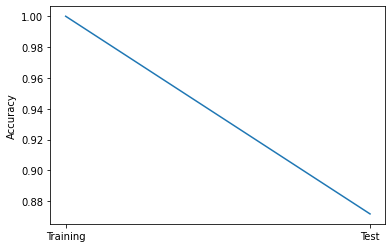

In [473]:
# Plot the accuracy scores
plt.plot([train_score, test_score])
plt.xticks([0, 1], ["Training", "Test"])
plt.ylabel("Accuracy")

# Show the plot
plt.show()

# MODEL-4 : Gradiant boosting classifier

In [474]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

clf = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)
print(clf)

(153, 22)
(153,)
(39, 22)
(39,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])


In [475]:
params = {
    'gradientboostingclassifier__n_estimators':range(25,100,10),
    'gradientboostingclassifier__max_depth':range(10,21,1)
}
params

{'gradientboostingclassifier__n_estimators': range(25, 100, 10),
 'gradientboostingclassifier__max_depth': range(10, 21)}

In [476]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 21),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [477]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 21),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [478]:
print('training accuracy = {}'.format(model.score(X_train,y_train)))
print('test accuracy = {}'.format(model.score(X_test,y_test)))

training accuracy = 1.0
test accuracy = 0.8974358974358975


In [479]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8974358974358975


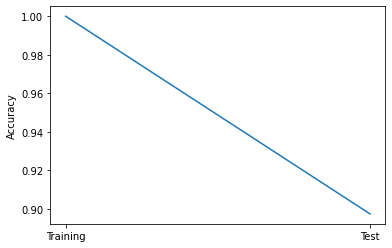

In [480]:
# Plot the accuracy scores
plt.plot([train_score, test_score])
plt.xticks([0, 1], ["Training", "Test"])
plt.ylabel("Accuracy")

# Show the plot
plt.show()

# Model 5 - Adaboost classifier


In [481]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

clf = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(random_state=42)
)
print(clf)

(153, 22)
(153,)
(39, 22)
(39,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])


In [482]:
params = {
    'adaboostclassifier__n_estimators':range(25,100,10)
}
params

{'adaboostclassifier__n_estimators': range(25, 100, 10)}

In [483]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [484]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [485]:
print('training accuracy = {}'.format(model.score(X_train,y_train)))
print('test accuracy = {}'.format(model.score(X_test,y_test)))

training accuracy = 1.0
test accuracy = 0.7948717948717948


In [486]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.7948717948717948


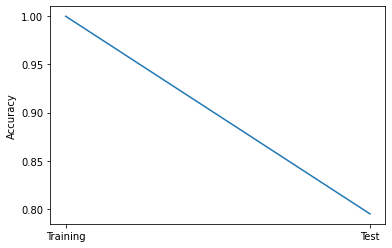

In [487]:
# Plot the accuracy scores
plt.plot([train_score, test_score])
plt.xticks([0, 1], ["Training", "Test"])
plt.ylabel("Accuracy")

# Show the plot
plt.show()

#### All Model accuracy score
1. Baseline accuracy = 0.7712418300653595 
        
2. Model-1 : Logistic regression  
        Train = 0.8823529411764706    
        Test  = 0.8717948717948718   

3. Model-2 : Decision Tree Model  
        Train = 1.0  
        Test = 0.8974358974358975 

4. Model-3 : Random Forest Model  
        Train = 1.0  
        Test = 0.8717948717948718  

5. Model-4 : Gradiant boosting classifier  
        Train = 1.0  
        Test = 0.8974358974358975  
        
6. Model-5 : Adaboost classifier  
        Train = 1.0  
        Test = 0.7948717948717948  

Based on the accuracy scores, it looks like the decision tree model (Model-2) and the gradient boosting classifier (Model-4) have the best performance on the test set. Both models achieve a test accuracy of around 89.7%.

The logistic regression model (Model-1) also performs well, with a test accuracy of 87.2%.

The random forest model (Model-3) and the Adaboost classifier (Model-5) have slightly lower test accuracy scores, at 87.2% and 79.5% respectively.

#### The better model in all of the above cases is the Decision tree Classifier as it can bypass the issue of multicollinearity and is much less complex compared to other models, hence,it is faster. Comparing The lower accuracy  is Adaboost classifier.

# Best model
# MODEL 2- Decision tree

In [488]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [489]:
dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [490]:
#accuracy scores
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8974358974358975


In [491]:
y_pred2=dt.predict(X_test)

In [492]:
# computes the training and test accuracy, precision, recall, and error rate of the model

cnf=confusion_matrix(y_test,y_pred2)
print('training accuracy = {}'.format(round(accuracy_score(y_train,dt.predict(X_train)),2)))
print('test accuracy = {}'.format(round((cnf[0][0]+cnf[1][1])/(cnf[0][0]+cnf[0][1]+cnf[1][0]+cnf[1][1]),2)))
print('test precision = {}'.format(round((cnf[1][1])/(cnf[0][1]+cnf[1][1]),2)))
print('test recall = {}'.format(round((cnf[1][1])/(cnf[1][0]+cnf[1][1]),2)))
print('test error = {}'.format(round((cnf[0][1]+cnf[1][0])/(cnf[0][0]+cnf[0][1]+cnf[1][0]+cnf[1][1]),2)))

training accuracy = 1.0
test accuracy = 0.9
test precision = 0.93
test recall = 0.93
test error = 0.1


In [493]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        28

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



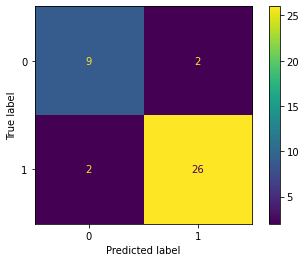

In [494]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)

# Feature Importance

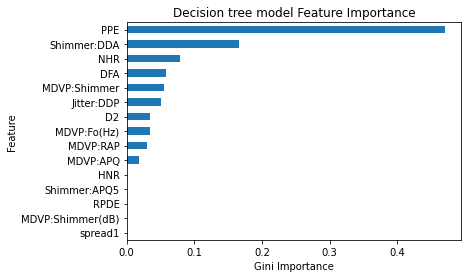

In [495]:
# Get importances
importances = dt.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()
# plot
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Decision tree model Feature Importance");

In [496]:
# shows that more than 98 % if data is segregated by above top 8 variables
feat_imp.tail(9).sum()

0.9821941765776485